<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/Iphone_Review_Sentiment_Analysis_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [14]:
df = pd.read_csv("/content/iphone.csv",encoding= 'unicode_escape')

In [5]:
affin=pd.read_csv('/content/Afinn.csv',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [6]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [7]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [8]:
calculate_sentiment(text='great')

3

In [17]:
# Calculating sentiment value for each sentence
df['sentiment_value']=df['sentence'].apply(calculate_sentiment)
df['sentiment_value']

0      3
1      0
2      0
3      1
4      0
      ..
928    0
929    0
930    4
931    4
932    0
Name: sentiment_value, Length: 933, dtype: int64

In [18]:
df['word_count']=df['sentence'].str.split().apply(len)
df['word_count']

0       2
1       5
2       5
3      24
4      15
       ..
928     5
929    13
930     4
931     3
932     6
Name: word_count, Length: 933, dtype: int64

In [19]:
df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
568,Flipkart only has a return policy on damaged p...,-4,16
418,"If you share photo or make delay in informing,...",-4,21
107,"They always priorities sellers than customers,...",-4,15
326,Must Go for cover and screen gaurd to avoid ac...,-3,11
139,The battery life is worst,-3,5
...,...,...,...
334,Moved from iphone 6s to iphone 12. Had a Great...,19,61
732,Best camera and great battery backup low light...,19,28
324,My 1st iPhone ever and Im loving it. Great pe...,21,29
450,I have bought iPhone as i have been gifted wit...,21,96


In [20]:
# Sentiment score of the whole review
df['sentiment_value'].describe()

count    933.000000
mean       3.096463
std        3.660091
min       -4.000000
25%        0.000000
50%        3.000000
75%        4.000000
max       23.000000
Name: sentiment_value, dtype: float64

In [21]:
# negative sentiment score of the whole review
df[df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,? eco system is ??,0,5
2,you Flipkart for this deal.??,0,5
4,You can definitely go for this. Due to late de...,0,15
5,Writing this review post 1 month of usage.,0,8
6,Writing this review after 50 days of heavy use.,0,9
...,...,...,...
923,- iOS has no bugs at all,-1,7
926,- Go with iPhone 12 if you value square design...,0,22
928,- Battery could be better,0,5
929,"- B15 Bionic is the fastest, most efficient an...",0,13


In [22]:
# positive sentiment score of the whole review
df[df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,??very nice,3,2
3,You can go for this without any hesitation i...,1,24
7,Wow superb camera phone,9,4
8,Wow simply wow; my second iPhone after iPhone ...,11,14
9,Worth the money invested. My first iPhone and ...,8,30
...,...,...,...
924,- If you are looking for a substantially bette...,2,32
925,- Great processing capabilities,3,4
927,- Consistent and super-smooth user experience ...,3,20
930,- awesome security?? features,4,4


In [23]:
# Adding index cloumn
df['index']=range(0,len(df))
df

,sentence,sentiment_value,word_count,index
0,??very nice,3,2,0
1,? eco system is ??,0,5,1
2,you Flipkart for this deal.??,0,5,2
3,You can go for this without any hesitation i...,1,24,3
4,You can definitely go for this. Due to late de...,0,15,4
...,...,...,...,...
928,- Battery could be better,0,5,928
929,"- B15 Bionic is the fastest, most efficient an...",0,13,929
930,- awesome security?? features,4,4,930
931,- awesome camera,4,3,931


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


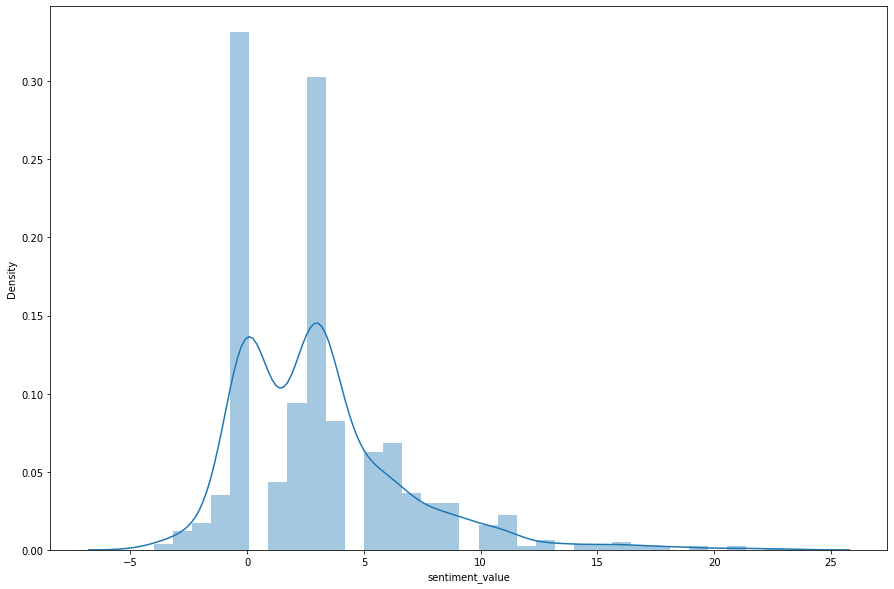

In [24]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['sentiment_value'])

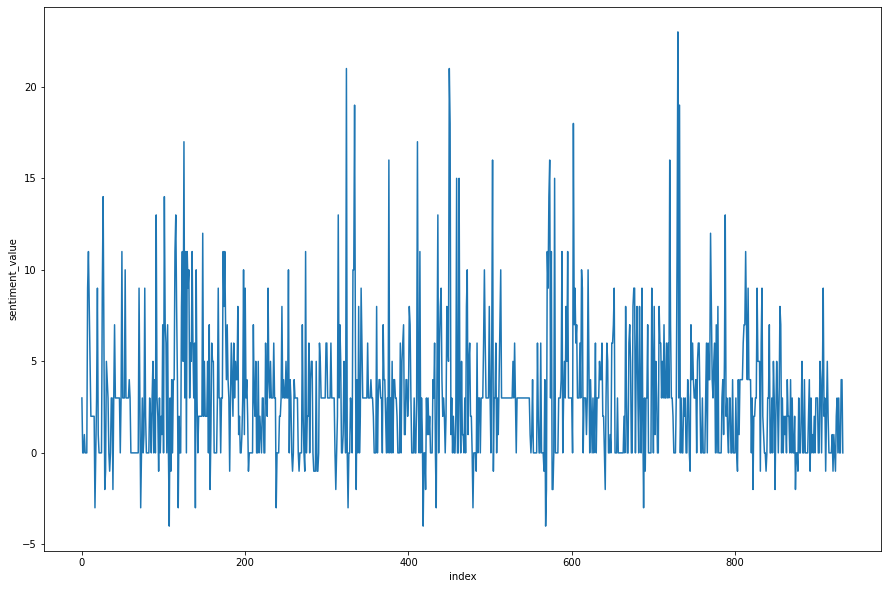

In [25]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=df)

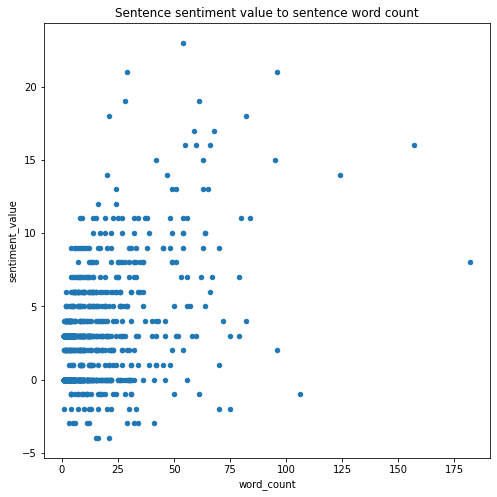

In [26]:
# Correlation analysis
df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')